In [1]:
import os, geopandas as gpd

In [2]:
# TRAER DATA
agua=gpd.read_file(os.path.join("maps","AGUA","AGUA.shp"))
ciudad=gpd.read_file(os.path.join("maps","CIUDAD","CIUDAD.shp"))
pais=gpd.read_file(os.path.join("maps","PAIS","PAIS.shp"))

DriverError: maps\AGUA\AGUA.shp: No such file or directory

In [ ]:
# MOSTRAR PAIS
pais.plot()

<Axes: >

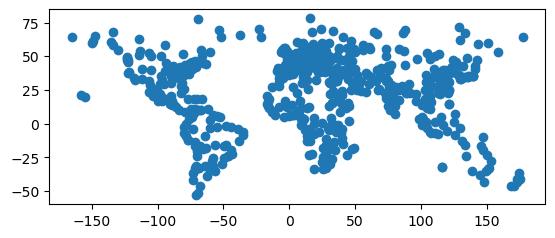

In [4]:
# MOSTRAR CIUDAD
ciudad.plot()

<Axes: >

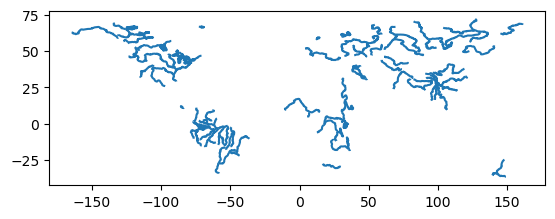

In [5]:
# MOSTRAR AGUA
agua.plot()

In [6]:
# TIPO DE CODIGO PAIS
pais.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# TIPO DE CODIGO CIUDAD
ciudad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# TIPO DE CODIGO AGUA
agua.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

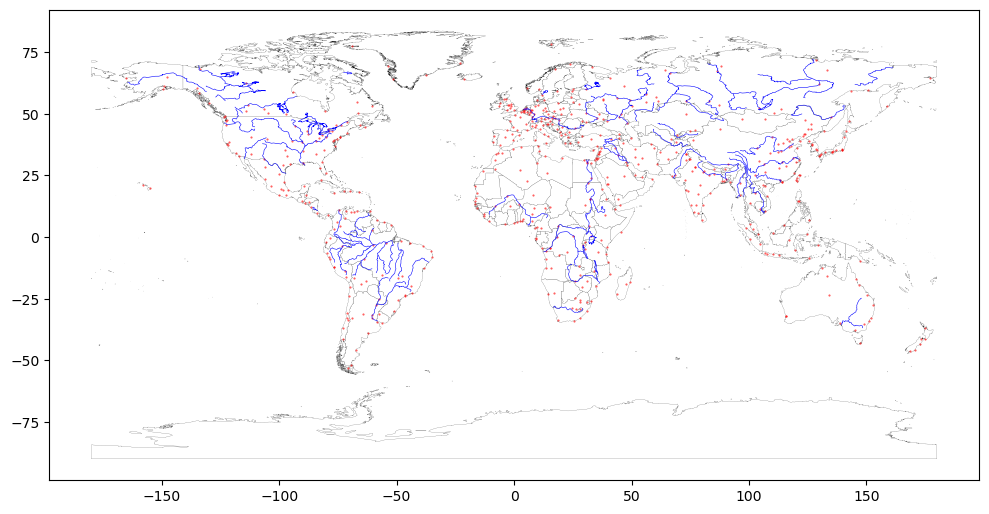

In [9]:
# GRAFICO DE TODO EL MUNDO PAIS, CIUDAD Y AGUA
base = pais.plot(facecolor="white", edgecolor='black', linewidth=0.1,figsize=(12,12))
ciudad.plot(marker='.', color='red', markersize=1,alpha=0.7,ax=base)
agua.plot(edgecolor='blue', linewidth=0.4,ax=base)

In [10]:
# MAPA INTERACTIVO MUNDO PAIS, CIUDAD, AGUA
import folium

m = ciudad.explore(color="red",name="cities")#optional
m = agua.explore(m=m, color="blue", name="rivers")

m

In [11]:
# SELECCIONAR SOLO 1 PAIS
canada=pais[pais.COUNTRY=='Canada']
canada

,COUNTRY,geometry
35,Canada,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ..."


<Axes: >

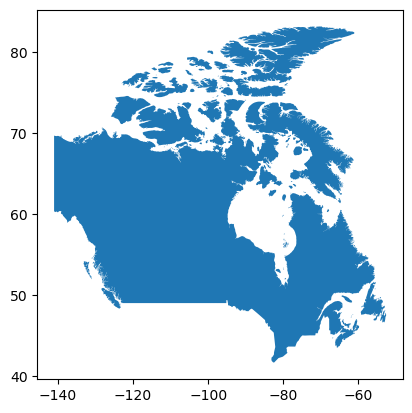

In [12]:
# 6.1 MOSTRAR GRAFICA CANADA
canada.plot()

<Axes: >

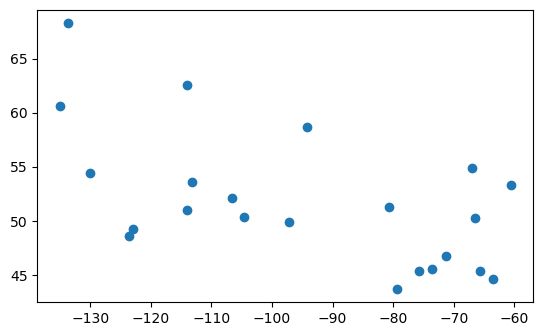

In [13]:
# 6.1 MOSTRAR CIUDADES CANADA

ciudad_canada = ciudad[ciudad.COUNTRY=='Canada']
ciudad_canada.plot()

<Axes: >

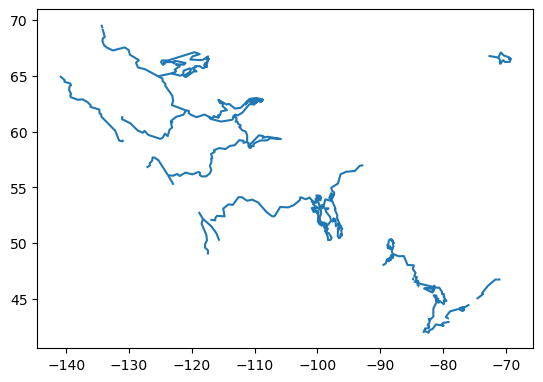

In [14]:
# 6.1 MOSTRAR RIOS CANADA

agua_canada = gpd.clip(gdf=agua,mask=canada)

agua_canada.plot()

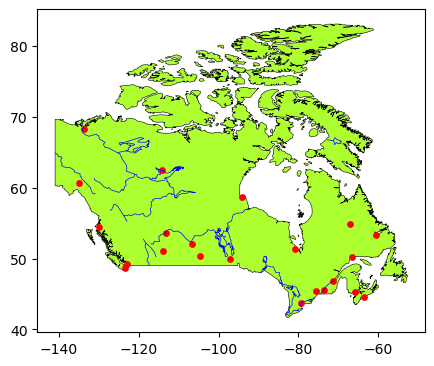

In [16]:
# 6.2 TODO JUNTO ESTATICO_CANADA
import matplotlib.pyplot as plt

base = canada.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
ciudad_canada.plot(marker='o', color='red', markersize=15,ax=base)
agua_canada.plot(edgecolor='blue', linewidth=0.5,ax=base)

plt.savefig("mapa_estatico_2.jpg")
plt.show()

In [17]:
# 6.3 GRAFICO INTERACTIVO TODO UNTO CANADA
import folium

canadaCoord=[56.130366, -106.346771]

m = ciudad_canada.explore(location=canadaCoord,zoom_start=10,tiles='CartoDB positron',color='red',name="cities")
m = agua_canada.explore(m=m, color="blue",name="rivers")

m

In [26]:
canada_n=canada.to_crs(5641)

ciudad_canada=ciudad[ciudad.COUNTRY=='Canada']
ciudad_n=ciudad_canada.to_crs(ciudad_canada.crs)


agua_n=agua.to_crs(canada_n.crs)
agua_n=gpd.clip(gdf=agua_n,mask=canada_n)

In [27]:
# 8. MAPAS DE CADA DATO
canada_n.to_file(os.path.join("maps","canadaMaps.gpkg"), layer='countries', driver="GPKG")
ciudad_n.to_file(os.path.join("maps","canadaMaps.gpkg"), layer='cities', driver="GPKG")
agua_n.to_file(os.path.join("maps","canadaMaps.gpkg"), layer='rivers', driver="GPKG")

In [28]:
# 9. DIRECCION DE MAPAS DE CADA DATO

canadaMaps = 'https://github.com/CarolinaPUCP/otrorepo/raw/main/maps/worldMaps.gpkg'

In [29]:
# COMPROBAR

from  fiona import listlayers

listlayers(canadaMaps)

['countries', 'cities', 'rivers']

In [ ]:
# FIN